---
---

# **PROYECTO FINAL DATA SCIENCE**

### Hugo Alejandro Montoya 
#### Comisión 39985 

<BR>
<BR>
<BR>
<BR>
<BR>

**NOTA: XAVI IR HASTA EL FINAL QUE ESTÁ LA PARTE III, LO ADJUNTÉ PARA LLEVARLO ASÍ LINEAL, CASI LO QUE TENEMOS QUE HACER PARA EL PROXIMO DESAFÍO, ENTONCES VA TODO COMPLETO **

---
---
# **PARTE 1**
# **Introducción** 
#### Data Set: Housing California 

Como se mencionó en entregas anteriores tenemos nuestros dataset que contiene el listado del censo a las casas en California, **por bloque de casas**, donde se recolecta data del precio (mediana) de las casas del bloque, la edad, el numero de habitaciones, cantidad de pobladores, hogares, el ingreso (que está expresado en 10.000 Dólares por cada unidad) y finalmente la proximidad al oceano. Tiene otras dos columnas de localicación geográfica (latitud-longitud).

---

## **Objetivo**
El Objetivo de este estudio es explicar las diferentes **Hipotesis** que están detalladas más adelante. Estas se centran en conocer el comportamiento demográfico y de vivienda en el estado de California, Estados Unidos.

## **Contexto comercial**
Queremos saber a partir del censo de California cómo es el precio de las casas, cómo están distribuidas, el ingreso que tienen estar personas, cuántos habitantes contiene, habitaciónes y edad de la población que constituye los datos . Es importante destacar que nos puede ayudar a dilucidar cómo se distribuye el costo de vivienda en este estado en particular y las diferentes varibles que influyen en esto, como también brindar poderosos Insights (perspectivas claves) que nos muestren patrones en la distribución del valor de las casas en California junto con los otros features.

## **Problema comercial**
Con los datos que vamos a analizar y explorar podremos responder preguntas más específicas como ¿En qué zonas de California es más elevado el valor de las casas y qué cercanía tienen al oceano? Estas preguntas tienen repercusión directa en el consumidor, así como ¿En qué ciudades principales o zonas del estado de California es más costoso y más asequible el precio de las viviendas?

## **Contexto analítico**

Se obtuvo un archivo .csv que contiene las columnas anteriormente mencionadas, que detallan la ubicación geográfica, la mediana de edad, ingresos, valor de las casas, habitaciones y hogares. Se hará una exploración de los datos (que comenzó en entregas pasadas) donde miraremos que variables presentan una correlación, cuales nos ayudan a explicar la preguntas que nos hemos hecho, así como visualizaciones que nos ayuden a entender las hipotesis que a continuación mencionaremos.

<br>

---
---

## **Analisis e Hipotesis sobre el Data Set** 
#### El **valor de las casas** será nuestra variable dependiente que buscaré explicar con las demás variables como el ingreso, la edad y proximidad al oceano, el comportamiento de esta variable puede ser el objetivo de estudio, para responder preguntas:

#### ---- ¿Cómo varía el precio de las casas con respecto a su cercanía al oceano?

#### ---- ¿Hay relación entre el número de habitantes y hogares de los bloques?

#### ---- ¿Hay relación entre población, ingresos y costo de la vivienda?

#### ---- ¿Cómo se distribuyen nuestros datos y que información nos entregan?

#### ---- ¿Qué Outliers podemos identificar?

Y luego llegar a buscar modelos que nos sirvan para predecir datos, encontrar patrones y aplicar Machine Learning.

---
---

# **EXPLORATORY DATA ANALYSIS (EDA)**

Como se hizo en entregas pasadas comenzamos la exploración de datos importando el dataset en formato CSV. En cada sección se hará una breve intervención explicando un poco de lo hecho y el respectivo análisis.



In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
housing_df = pd.read_csv('data/california_housing.csv')
housing_df

#Llamamos el data set, vemos que tiene 10 columnas o features. También que tiene 20.640 líneas o registros.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
housing_df.info()

#Vemos que tenemos 9 columnas tipo float (númericas) y una tipo 'objeto' que es la de proximidad al oceano.
#Igualmente la columna de total_bedrooms tiene 207 registros con valores null.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_df.describe()
#Una descripción rápida de los datos por columna.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
#Hice drop de los Nan
df_sin_nan = housing_df.dropna(subset="total_bedrooms")


In [ ]:
df_sin_nan['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
df_sin_nan.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
#Nombré las columnas para llamarlas más fácil 
Longitud = housing_df['longitude'] 
Latitud = housing_df['latitude']
valor_casas = housing_df['median_house_value']
ingreso = housing_df['median_income']
hogares = housing_df['households']
poblacion = housing_df['population']
proximidad_mar = housing_df['ocean_proximity']

---
---

# **Analisis de las variables disponibles con estadística descriptiva**


#### **VALOR CASAS**
Tenemos la media y la mediana cercanos a los 200.000 USD, con un gráfico más adelante buscaremos ver cómo se distribuyen los datos, si existen Outliers, o se salen de la IQR.

#### **EDAD** 
Nuestra media de edad está en 28 y la mediana en 29, podemos observar que gran parte de la población de nuestro dataset se encuentra cerca a los 30 años.

#### **HABITACIONES Y  DORMITORIOS**
Haciendo un analisis rapido se puede observar que la relación de dormitorios a habitaciones va entre 3 y 5 habitaciónes por cada dormitorio. Las medias y las medianas tienen valores cercanos en las dos variables.

#### **POBLACIÓN**
Vemos que tenemos una distribución bastante amplia en esta variable que va desde los 3 hasta los 35.000 habitantes por bloque. Con valores tan grandes, la mediana nos da una pista con un número que ronda los 1700 habitantes por bloque.

#### **HOGARES**
La cantidad de hogares, pareciera tener relación con la cantidad de habitantes por bloques, encontramos unos valores de 400 para la mediana y  aproximadamente 500 para la media, lo cual nos podría indicar una distribución a la izquierda, al ser menor la mediana que la media. 

#### **INGRESO** 
El ingreso medio esta en 38.000 USD y la mediana 35.000, tenemos datos que van hasta 150.000, buscaremos cómo se distribuye esto para observar las relaciones con las otras variables.

#### **PROXIMIDAD AL OCEANO**
Cambiamos por números para identificar y poder hacer conteos de las diferentes categorías que nos relatan que tan cerca o lejos estan las casa del Oceano y cómo influye en los precios.

#### **LONGITUD-LATITUD**
Estas columnas nos dan coordenadas de ubicación de los bloques en el estado de California.EEUU, tal vez más adelante utilizaremos estas para mirar como se distribuyen nuestros datos. 

---
---


# **PARTE II**
# **VISUALIZACIONES Y ANÁLISIS DE HIPOTESIS**



## **HIPOTESIS/PREGUNTA**

¿Hay relación entre población, ingresos y costo de la vivienda?

A continuación a través de varios tipos de gráficos buscaremos ver si hay relación entre las variables mencionadas

Text(0, 0.5, 'Conteo')

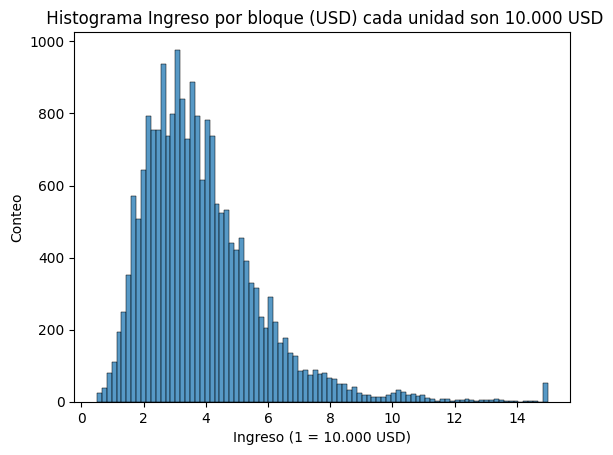

In [ ]:
histo_ingreso = sns.histplot(data = housing_df, x = ingreso )
histo_ingreso.set_title(' Histograma Ingreso por bloque (USD) cada unidad son 10.000 USD')
histo_ingreso.set_xlabel('Ingreso (1 = 10.000 USD)')
histo_ingreso.set_ylabel('Conteo')

Text(0.5, 1.0, 'Relacion entre Proximidad e Ingreso')

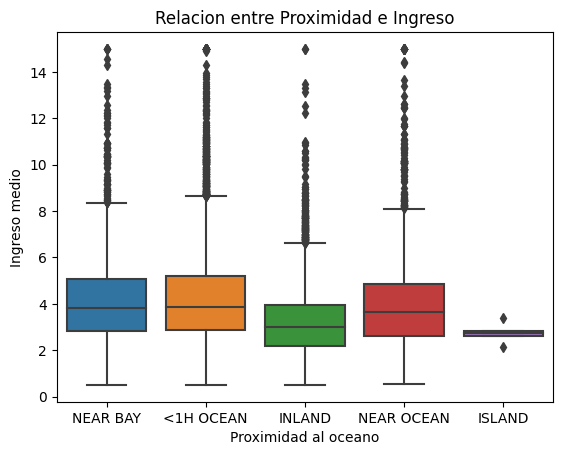

In [ ]:
grafico1 = sns.boxplot(data= housing_df, x = proximidad_mar , y = ingreso )
grafico1.set_xlabel('Proximidad al oceano')
grafico1.set_ylabel('Ingreso medio')
grafico1.set_title('Relacion entre Proximidad e Ingreso')

## **Analisis**

Podemos ver que el Ingreso (mediana) de los habitantes de California se encuentra mayormente entre los 15.000 y los 60.000 USD en nuestro primer gráfico solamente de Ingreso. Al juntarlo con la variable de proximidad al Oceano, vamos que se acumula la mayoría entre los 25.000 y 50.000 nuevamente, teniendo muchos puntos considerados outliers por encima de los 80.000 USD.

---

Text(0, 0.5, 'Valor de las casas en USD')

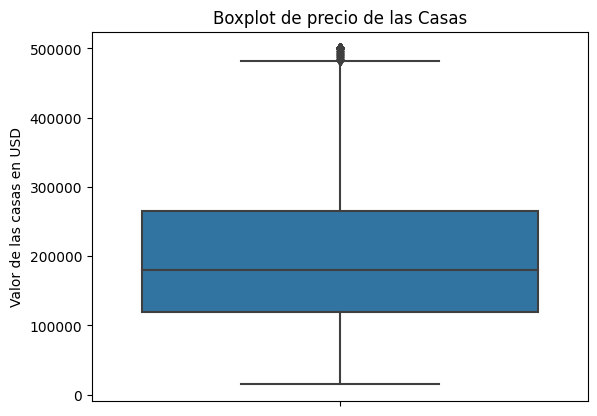

In [ ]:
grafico_mediana_casas = sns.boxplot( data= housing_df, y = valor_casas)
grafico_mediana_casas.set_title('Boxplot de precio de las Casas')
grafico_mediana_casas.set_ylabel('Valor de las casas en USD')

Text(0, 0.5, 'Valor casas')

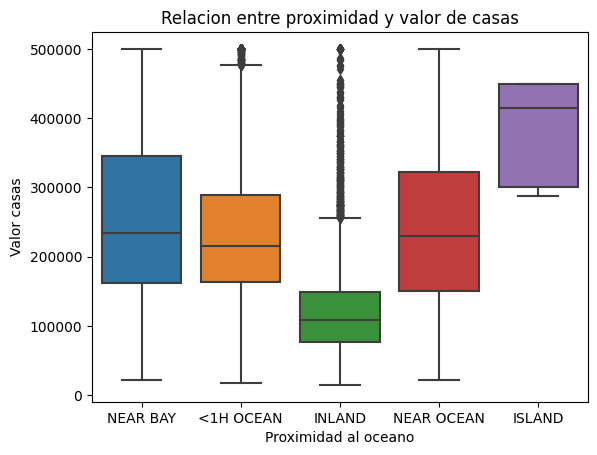

In [ ]:
grafico_box2 = sns.boxplot(data = housing_df , x = proximidad_mar , y = valor_casas )

grafico_box2.set_title('Relacion entre proximidad y valor de casas')
grafico_box2.set_xlabel('Proximidad al oceano')
grafico_box2.set_ylabel('Valor casas')

## **Analisis**

Iniciamos con un boxplot de la mediana del valor de las casas, nos indica que el 50% de las casas están entre 120.000 y 280.000 USD, con unos cuantos outliers cercanos a los 500.000 que también vemos en el siguiente gráfico.

Cuando vemos la relación entre el precio de las casas y la proximidad a través de un Boxplot, nos deja ver que las medianas de las que están **Cerca al oceano, cerca a la bahía y a 1 hora del oceano** presentan medianas similares y la mayoría de su distribución entre los 180.000 USD hasta los 340.000 USD, aquí está el grueso del valor de las casas entre casi la mayoría de categorías. Las casas de **Tierra Adentro (Inland)** oscilan precios de 100.000 a 150.000 USD teniendo muchos outlier después de los 250.000 USD. Y finalmente las casas en la Isla tiene un elevado precio que ronda los 400.000 USD y son una minoría.

---

## **HIPOTESIS/PREGUNTA**
¿Hay relación entre el número de habitantes y hogares de los bloques?

Text(0, 0.5, 'Cantidad de habitantes por bloque')

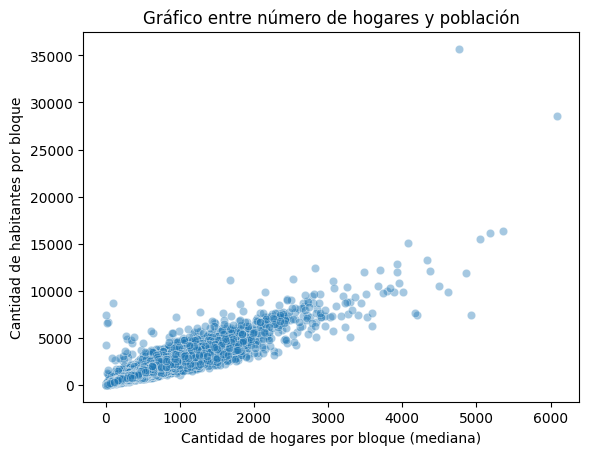

In [ ]:
sns.scatterplot(data=housing_df , x = hogares , y = poblacion, alpha = 0.4 )
plt.title('Gráfico entre número de hogares y población') 
plt.xlabel('Cantidad de hogares por bloque (mediana)')
plt.ylabel('Cantidad de habitantes por bloque')

## **Analisis**

Vemos una relación entre estas dos variables, a medida que aumenta los hogares por bloque vemos aumento de la población aunque tenemos un scatter muy denso, donde casi que la mayoría de bloque **Contienen una población de hasta 5.000 habitantes**. y 2.000 hogares por bloque. Luego podemos ver unos datos más dispersos a medida que aumentan los hogares.

---

## **HIPOTESIS/PREGUNTA**


¿Cómo varía el precio de las casas con respecto a su cercanía al oceano?

El valor de las casas puede variar según su locación geográfica y cercanía la mar. 



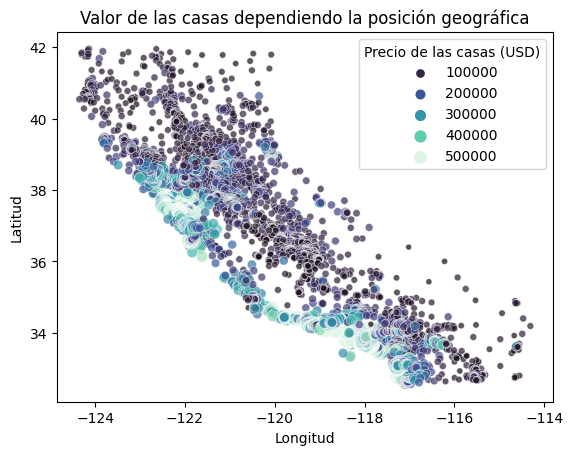

In [ ]:
sns.scatterplot(data= housing_df, x= Longitud , y= Latitud , size= valor_casas ,  hue= valor_casas,  palette="mako",alpha=0.7) 
#Al llamar la Longitud y la latitud, me hacen una especie de mapa cartográfico y busqué paletas de colores de seaborn que ayudaran a la diferenciación de precios
#el atributo Size, nos da el tamaño de los puntos dependiento del valor de las casas
 
plt.title("Valor de las casas dependiendo la posición geográfica")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title= "Precio de las casas (USD)", loc="upper right")


## **ACLARACIÓN Y ANALISIS**

A continuación adjunto un mapa de California para ilustrar un poco el objetivo del anterior gráfico y que nos pueda revelar más información de la distribución de nuestros datos. La localización geográfica que al principio no fue tenida en cuenta en el análisis, aquí nos brindó una imagen más clara de cómo se comporta el precio de las casas respecto a su ubicación geográfica.

Arriba podemos analizar, **por color** la distribución de los precios a lo largo del estado de California. El color oscuro son las casas que tienen valores cercanos a 100.000 USD, podemos inferir que la mayoría son **TIERRA ADENTRO (INLAND)** Como se ve claramente en el mapa abajo de California. 

Los colores más claros, a medida que va aumentado el precio de las casas, está evidentemente **más cerca del oceano, de la bahía y además de ciudades principales (NEAR OCEAN, NEAR BAY, 1H TO OCEAN, ISLAND)** o en pequeñas islas lujosas frente a estas ciudades. 

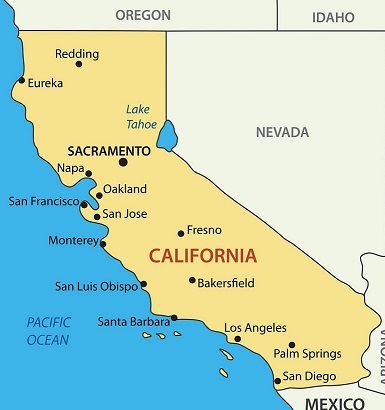

--- 

## **HIPOTESIS/PREGUNTA**

¿Cómo se distribuyen nuestros datos y que información nos entregan?
¿Qué Outliers podemos identificar?

## **CONCLUSIÓN**

El úlitmo gráfico nos ayudó a visualizar la información que estabamos analizando de qué influye en el precio de las viviendas, y como se relaciona con variables como ingreso, personas y **ubicación**.

Encontramos una cantidad de outliers con precios muy por encima de las medidas descriptivas, casas con valores cercanos a los 500.000 USD y personas con ingresos mucho más arriba de 80.000 hasta 150.000 USD cuando la media y el grueso de la población de California gana entre 20.000 y 50.000 USD aproximadamente.

Hablando de ciudades, haciendo un análisis geográfico de norte a sur, detallamos que: 

-Eureka es una ciudad costera ubicada cerca del oceano, sin embargo, no está tan cerca de otras ciudades y los precios de las casas rondan los 100.000 USD.

-Sacramento que es la capital, tenemos alta densidad de puntos en esta, se ve que en esta ciudad los precios aumentan en el centro de ella, y a medida que nos alejamos vemos los precios disminuir y estar rodeados de valores cercanos a los 100.000 y 200.000 USD en sentido nor y sur. por la zona media, o sea, a más de **1H del oceano y Tierra adentro** la mayoría de casas están en estos precios. 

-Hacia la izquierda acercándonos al mar está cerca a la bahía de San Francisco, vemos que está es la zona más amplia con puntos más claros, con casas que tienen un valor entre 300.000 y 500.000 USD, siendo de las zonas más costosas de California **(NEAR BAY Y NEAR OCEAN)**

-Siguiendo por la costa hacia el sur, encontramos Santa Barbara que también tiene una considerable cantidad de casas con valores superiores a los 300.000 USD y llegamos a Los Angeles y  San Diego donde está otra zona de casas exclusivas superiores a estos valores y llegando hasta los 500.000 dolares, como también en lujosas islas **(NEAR BAY, NEAR OCEAN, ISLAND)** cerca de estas grandes ciudades.

---

---


# ***PARTE III*** 

En esta nueva entrega realizaremos una reducción de la dimensionalidad de nuestros datos a través de un PCA, un analisis de nuestros Componentes Principales y qué tanto nos dicen. 

También probaremos un modelo de regresión lineal para tratar de predecir con nuestros datos futuros datos. 



--- 

### **PCA (Principal Components Analysis)**

In [ ]:
#Estandarización de las variables 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#Importamos las librerías de scikit learn

df_var_num = df_sin_nan[ [ 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'] ] 
#Subseteé el df sin la columna ocean_proximity porque no es una variable númerica, al igual que Longitud y Latitud, 

scaler = StandardScaler()
scaler.fit(df_var_num.values) #ESTO CALCULA LA MEDIA Y EL STD
housing_estandarizado = scaler.transform(df_var_num.values) 

In [ ]:
housing_estandarizado

array([[ 0.98216331, -0.8038126 , -0.97032521, ..., -0.97683327,
         2.34516291,  2.12881864],
       [-0.60621017,  2.0421302 ,  1.34827594, ...,  1.67037262,
         2.33263161,  1.31362603],
       [ 1.85576873, -0.53518928, -0.82556097, ..., -0.84342665,
         1.78293943,  1.25818254],
       ...,
       [-0.92388486, -0.17504183, -0.12547157, ..., -0.17377773,
        -1.14317103, -0.99247676],
       [-0.84446619, -0.35534437, -0.30583358, ..., -0.39350628,
        -1.05513604, -1.05831591],
       [-1.00330353,  0.06795473,  0.18541559, ...,  0.07995643,
        -0.78060586, -1.01759959]])

In [ ]:
#PCA 
pca = PCA()
pca.fit(housing_estandarizado)
pca_housing = pca.transform(housing_estandarizado)

In [ ]:
pca.explained_variance_ratio_

array([0.55566883, 0.24297098, 0.12919081, 0.04143852, 0.02013617,
       0.00842378, 0.00217092])

In [ ]:
varianza_explicada = np.round(pca.explained_variance_ratio_*100, 2)
varianza_explicada

array([55.57, 24.3 , 12.92,  4.14,  2.01,  0.84,  0.22])

In [ ]:
np.cumsum(varianza_explicada)

array([ 55.57,  79.87,  92.79,  96.93,  98.94,  99.78, 100.  ])

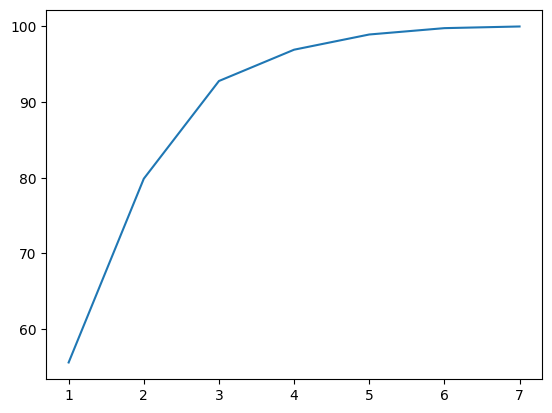

In [ ]:
#Gráfico de codo 
plt.plot(range(1,8), np.cumsum(varianza_explicada))

## **Análisis**

Después de estandarizar nuestros datos y realizarle un PCA, podemos observar que la mezcla de nuestras variables en su primer componente es del 55% lo cual nos explica bastante de nuestros datos. Después de escoger las columnas(variables) númericas, excluimos Longitud y Latitud, al igual que la proximidad al oceano por ser una categoría. A partir del 3er componente vemos en el gráfico de codo, que tenemos más del 90% de nuestros datos explicados y la curva se aplana un poco. 

--- 

# **MODELO REGRESIÓN LINEAL**

In [ ]:

#Llamé las librerías que necesitamos para el modelo lineal 
from scipy import stats
import statsmodels.formula.api as sm #Para ajustar modelos lineales
from statsmodels.stats.outliers_influence import OLSInfluence



In [ ]:
# Armamos el modelo con la fórmula. Lo que viene antes del ~ es la variable que queremos explicar (la dependiente) y lo que viene después son las variables que lo explican (independientes)
modelo = 'median_house_value ~ median_income + housing_median_age + population ' 
lm1   = sm.ols(formula = modelo, data = df_var_num).fit()
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     7100.
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        23:58:31   Log-Likelihood:            -2.5987e+05
No. Observations:               20433   AIC:                         5.198e+05
Df Residuals:                   20429   BIC:                         5.198e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.735e+04   2257

## **ANALISIS Y CONCLUSIÓN**

Deespués de probado el modelo donde le dijimos que el la mediana del **Precio de las casas** fuera explicado o que tanto era dependiente de los datos de **Ingreso (Mediana)** + **Edad (Mediana)** + **Población** observamos en el *R Cuadrado* que obtuvimos un valor de **0.510** , en una escala de 0 a 1.

Estas variables nos explican y predicen medianamente bienel valor de las casas, no está tan cerca al 0 y se comporta bien, porque sabemos que casas más caras están relacionadas con ingresos más altos, la edad influye y la población al ser los bloque más populosos los que tienen un valor menor o cerca a la mediana, entre más edad tiene la población medida menos habitan los bloques y más costosas son las viviendas.

El P Value nos indica que al ser menor que 0.05 las variables son importantes a la hora de evaluar este modelo y sí lo explican.
